# Assignment 1.1

Name:  Victor Hugo Germano
Date: 09/05/2024

In [29]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import scipy.stats as st

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## **Problem # 1.1.** 
In the 2018 election for Senate in California, a CNN exit poll of 1882 voters stated that 52.5% voted for the Democratic candidate, Diane Feinstein. Of all 11.1 million voters, 54.2% voted for Feinstein.

(a) What was the (i) subject, (ii) sample, (iii) population? 


`(a) Your answer goes here`

In [30]:
subject_candidate = "Diane Feinstein"

total_population = 11,100,000

sample_population = 1882


## **Problem # 1.2.** 
The `Students` data file at [http://stat4ds.rwth-aachen.de/data/Students.dat](http://stat4ds.rwth-aachen.de/data/Students.dat) responses of a class of 60 
social science graduate students at the University of Florida to a questionnaire that asked about *gender* (1 = female, 0 = male), *age*, *hsgpa* = high school GPA (on a four-point scale), cogpa = college GPA, *dhome* = distance (in miles) of the campus from your home town, *dres* = distance (in miles) of the classroom from your current residence, *tv* = average number of hours per week that you watch TV, *sport* = average number of hours per week that you participate in sports or have other physical exercise, *news* = number of 
times a week you read a newspaper, *aids* = number of people you know who have died from AIDS or who 
are HIV+, *veg* = whether you are a vegetarian (1 = yes, 0 = no), *affil* = political affiliation (1 = Democrat, 2 
= Republican, 3 = independent), *ideol* = political ideology (1 = very liberal, 2 = liberal, 3 = slightly liberal, 4 
= moderate, 5 = slightly conservative, 6 = conservative, 7 = very conservative), *relig* = how often you 
attend religious services (0 = never, 1 = occasionally, 2 = most weeks, 3 = every week), *abor* = opinion 
about whether abortion should be legal in the first three months of pregnancy (1 = yes, 0 = no), *affirm* = 
support affirmative action (1 = yes, 0 = no), and *life* = belief in life after death (1 = yes, 2 = no, 3 = 
undecided). You will use this data file for some exercises in this book. 


(a) Practice accessing a data file for statistical analysis with your software by going to the book’s 
     website and copying and then displaying this data file.


### (a) Accessing the Students file and showing the first few lines

In [31]:

# Read in the Students data file
students = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Students.dat', sep=r'\s+')

# View the first few rows of the dataset
students.head()

,subject,gender,age,hsgpa,cogpa,dhome,dres,tv,sport,news,aids,veg,affil,ideol,relig,abor,affirm,life
0,1,0,32,2.2,3.5,0,5.0,3.0,5,0,0,0,2,6,2,0,0,1
1,2,1,23,2.1,3.5,1200,0.3,15.0,7,5,6,1,1,2,1,1,1,3
2,3,1,27,3.3,3.0,1300,1.5,0.0,4,3,0,1,1,2,2,1,1,3
3,4,1,35,3.5,3.2,1500,8.0,5.0,5,6,3,0,3,4,1,1,1,2
4,5,0,23,3.1,3.5,1600,10.0,6.0,6,3,0,0,3,1,0,1,0,2


(b) Using responses on *abor*, state a question that could be addressed with (i) descriptive 
     statistics, (ii) inferential statistics.


A question about abortion looking at the dataset: 

**What's the distribution of people in favor of abortion being legal in the first three months, and how that can be an estimation about the opinion within the university?**

---


## **Problem # 1.3.** 
Identify each of the following variables as categorical or quantitative: (a) Number of smartphones that you own; (b) County of residence; (c) Choice of diet (vegetarian, nonvegetarian); (d) Distance, in kilometers, commute to work

| variable | data type | why? |
| --- |  --- | --- |
| Number of smartphones you own | Quantiative | countable |
| Country of Residence | Categorical  | non countable |
| Choice of diet |  Categorical | non countable |
| Distance commute to work |  Quantitative | countable |

---

## **Problem # 1.4.** 
Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous

Examples of variables:

- Categorical
  - Eye Collors
  - Place of Origin
- Quantitative
  - Monthly Salary
  - Restaurant Capacity
- Discrete
  - Units Sold
  - Number of Attendees
- Continuous
  - Oil Prices
  - Temperature Outsite

---

# Define Methods to be used on the next problems

In [32]:
# Plotting function for histogram
def histogram_plot(ylabel, xlabel, dataset, column, bins=10):
    gs = gridspec.GridSpec(1,1)
    fig = plt.figure(figsize=(5,3))
    ax = fig.add_subplot(gs[0])
    ax.set_xlabel(xlabel)
    dataset[column].hist(ax=ax, grid=False, bins = bins)
    fig.supylabel(ylabel)
    plt.show()


def print_summary(Min_value, Max_value, median, Lower_quartile, Upper_quartile):
    print("Five-number summary: min:%.2f max:%.2f median:%.2f lower q:%.2f upper q:%.2f"% (Min_value, Max_value, median, Lower_quartile, Upper_quartile)) 
    
def calculate_five_number_summary(array):
    # Extreme Values
    Max_value = array.max()
    Min_value = array.min()
    
    # Lower and upper Quartiles
    Lower_quartile = np.percentile(array, 25)
    Upper_quartile = np.percentile(array, 75)
    
    # Median
    median = np.median(array)

    return Min_value, Max_value, median, Lower_quartile, Upper_quartile

## **Problem # 1.10.** 
Analyze the `Carbon_West` ([http://stat4ds.rwth-aachen.de/data/Carbon_West.dat](http://stat4ds.rwth-aachen.de/data/Carbon_West.dat)) data file at the book’s website by **(a)** constructing a frequency distribution and  a histogram, **(b)** finding the mean, median, and standard deviation. Interpret each.

`(a)`

In [33]:
# Reading file
carbon_west = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Carbon_West.dat', sep=r'\s+')
carbon_west.head()

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2


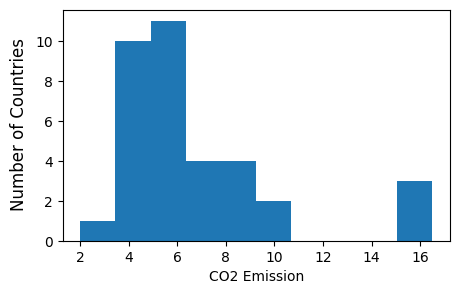

In [34]:

#freq_table = pd.crosstab(carbon_west['CO2'], 'CO2 Production') 

# Generate Histogram
histogram_plot("Number of Countries", "CO2 Emission", carbon_west, "CO2")

`(b) Your answer goes here`

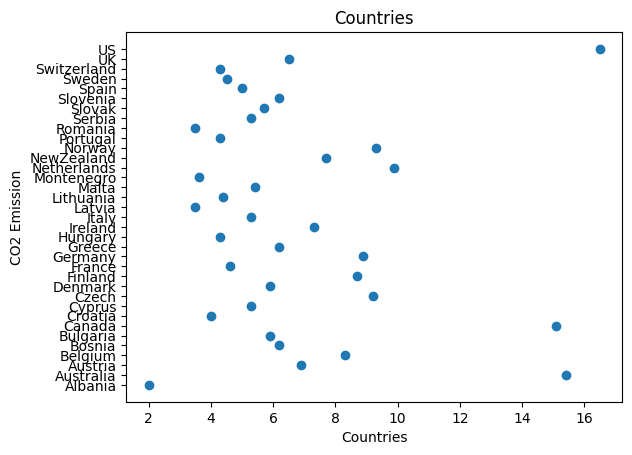

CO2 Emissions: Mean=6.72, Median=5.90, Std Dev=3.31


In [35]:
countries = carbon_west["Nation"]
co2 = carbon_west["CO2"]
plt.scatter(co2, countries)
plt.xlabel('Countries')
plt.ylabel('CO2 Emission')
plt.title('Countries')
plt.show()

# Print mean, median, and standard deviation
print('CO2 Emissions: Mean=%.2f, Median=%.2f, Std Dev=%.2f' % (np.mean(co2), np.median(co2), np.std(co2)))



### Data Interpretation 

The data presents the CO2 emission for a list of countries in europe, north america and australia, and the data extracted from the file can be interpreted as:

Mean
- The average CO2 emissions for any given country in the list is 6.72kt

Median
- If we were to split the list in two buckets, the value in the middle that defines a side would be 5.9kt

Stand Deviation
- Given any of the countries in the list, their co2 emission would be distant from the average emissons of the list by 3.31kt. Even though this is information is important, it also hides the outliers in the list with emission beyond 15kt, that contribute to a higher general avarage

---


## **Problem # 1.11.** 
According to Statistics Canada, for the Canadian population having income in 2019, annual income had a median of `$`35,000 and mean of `$`46,700. What would you predict about the shape of the distribution? Why?


## Answer 1.11

Given the difference between the median and the mean values on income for Canada, we can expect to see a distribution with a large range of income between the lower and high end of income values, possibily representing a larger population on the lower income quadrant, and a large variation of higher income, pushing the mean value up

We can also expect a large standad deviation, and a desproportionated large number of individuals on the lower income quadrant.

The representation of the bell shaped curve distribution will be skewed in this case.

---

## **Problem # 1.13.**
A report indicates that public school teacher’s annual salaries in New York city have an approximate  mean of `$`69,000 and standard deviation of `$`6,000. If the distribution has approximately a bell shape, report intervals that contain about (a) 68%, (b) 95%, (c) all or nearly all salaries. Would a salary of  `$`100,000 be unusual? Why? 



Given the Cofficient of Variation of 8,6% we can explore the scenarios for a bell shape distribution:

a) 68% confidence level 
- Because the population is small in relation to all salaries, a annual salary of 100k is possible, falling outside of the mean distribution.

b) 95% confidence level 
- With this report interval is highly unlikely that a salary of 100k be presented


c) 100% confidence level (all possible salaries)
- In this scenario the salary of $100,000 would impossible, given the standard deviation and the fact that this scenario contains nearly all possible salaries



## **Problem # 1.17.** 
From the `Murder` data file ([http://stat4ds.rwth-aachen.de/data/Murder.dat](http://stat4ds.rwth-aachen.de/data/Murder.dat)) at the book’s website, use the variable murder, which is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). Using software:  
(a) Find the mean and standard deviation and interpret their values.  
(b) Find the five-number summary, and construct the corresponding box plot. Interpret.  
(c) Now include the observation for D.C. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

**Answer:**

`(a) Your answer goes here` 

In [36]:
# Method definitions to be reused

def print_murder_rates(numbers):
    print('Murder rates by State: Mean=%.2f, Std Dev=%.2f, Median=%.2f' % (np.mean(numbers), np.std(numbers), np.median(numbers)))

    


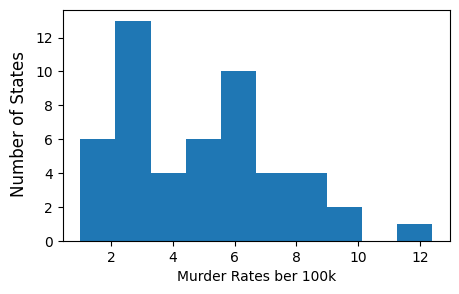

Murder rates by State: Mean=4.87, Std Dev=2.56, Median=4.85


In [37]:

murder_rates = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Murder.dat', sep=r'\s+')

# Remove DC from murder rates
no_DC = murder_rates.drop(murder_rates.index[(murder_rates["state"] == "DC")],axis=0)
murder_numbers_no_dc = no_DC["murder"]


histogram_plot("Number of States", "Murder Rates ber 100k", no_DC, "murder")

print_murder_rates(murder_numbers_no_dc)


### Interpretation

Given the data provided, we conclude that there are an avarege of 4.87 murders per 100,000 in the US, with a variation of 2.5. As we plot an histogram represeting the data, it is possible to see an skewed distribution of a bell shape 


`(b) Your answer goes here`

Five-number summary: min:1.00 max:12.40 median:4.85 lower q:2.62 upper q:6.17


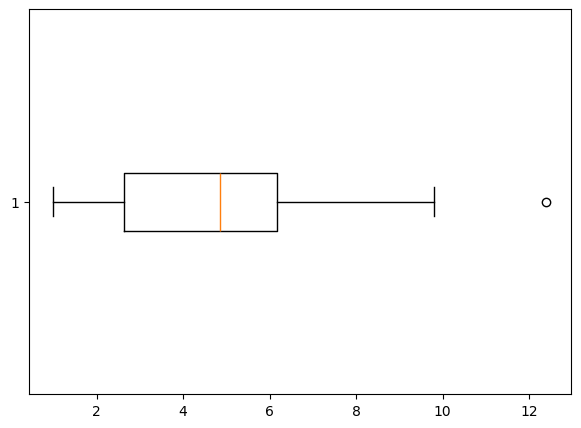

In [38]:
### Five-number summary

five_numbers = calculate_five_number_summary(murder_numbers_no_dc)

print_summary(*five_numbers)


# Creating plot
fig = plt.figure(figsize =(7, 5))
plt.boxplot(murder_numbers_no_dc, vert=False)

# show plot
plt.show()


`(c) Your answer goes here` 

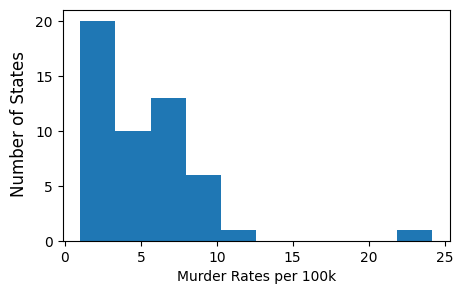

# Including DC:
Murder rates by State: Mean=5.25, Std Dev=3.69, Median=5.00
Five-number summary: min:1.00 max:24.20 median:5.00 lower q:2.65 upper q:6.45


In [39]:
# Redefining murder_numbers to include DC

murder_numbers = murder_rates["murder"]


histogram_plot("Number of States", "Murder Rates per 100k", murder_rates, "murder")

print("# Including DC:")
print_murder_rates(murder_numbers)
print_summary(*calculate_five_number_summary(murder_numbers))


## Interpretation of considering DC 

- It is clear that the inclusion of DC afects most results calculated before, specially moving the maximun value to 24.20, increasing the range 
- Mean and Median had an increase lower than 10% with Mean being more afected, with an increase of 7%
- The Standard Deviation changed more than 40%
- Upper quartile was more affected, increasing from 6.17 to 6.45
- Relative Standard Deviation (coefficient variation) changed from 52% to 70%
- Positively Skewed distribution, with a long tail

---


## **Problem # 1.18.**
The `Income` data file ([http://stat4ds.rwth-aachen.de/data/Income.dat](http://stat4ds.rwth-aachen.de/data/Income.dat)) at the book’s website reports annual income values in the U.S., in thousands of dollars.

(a) Using software, construct a histogram. Describe its shape.  
(b) Find descriptive statistics to summarize the data. Interpret them.  
(c) The kernel density estimation method finds a smooth-curve approximation for a histogram. At each value, it takes into account how many observations are nearby and their distance, with more weight given those closer. Increasing the bandwidth increases the influence of observations further away. Plot a smooth-curve approximation for the histogram of income values. Summarize the impact of increasing and of decreasing the bandwidth substantially from the default value.  
(d) Construct and interpret side-by-side box plots of income by race (B = Black, H = Hispanic, W = White).  Compare the incomes using numerical descriptive statistics

In [40]:
# File Load
income_data = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Income.dat', sep=r'\s+')


**Answers:**

`(a) Your answer goes here`

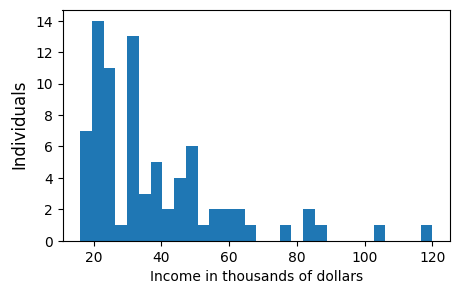

Income Curve information: Mean:37.52
Five-number summary: min:16.00 max:120.00 median:30.00 lower q:22.00 upper q:46.50


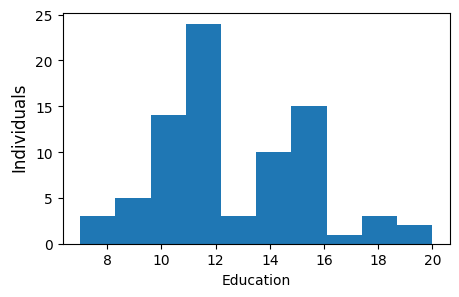

Education Curve information: Mean:12.69
Five-number summary: min:7.00 max:20.00 median:12.00 lower q:10.00 upper q:15.00


In [57]:

# Generate Histogram
histogram_plot("Individuals", "Income in thousands of dollars", income_data, "income", bins=30)

print("Income Curve information: Mean:%.2f"%(np.mean(income_data["income"])))
print_summary(*calculate_five_number_summary(income_data["income"]))

# Generate Histogram
histogram_plot("Individuals", "Education", income_data, "education")

print("Education Curve information: Mean:%.2f"%(np.mean(income_data["education"])))
print_summary(*calculate_five_number_summary(income_data["education"]))

### Explanation

The Income histogram presents an Asymmetrical distribution, Positively Skewed with a long tail, meaning that most of the cluster is centered closed to the lower values, with frequency reducing as we move to higher salaries. 

We also notice that Mean and Median are far apart, with the value Mean 37.52 and Median 30

Important to note that this histogram considers the full dataset, without analyzing specific samples like race and education. Using these variations could change the representation of the graph, and subsequent analyzis 


---

`(b) Your answer goes here`

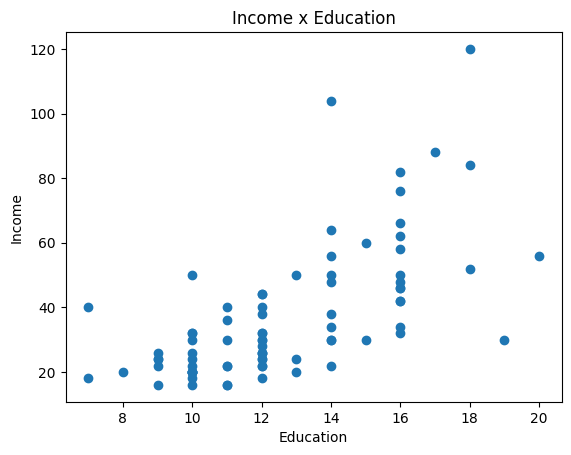

           income  education
count   80.000000  80.000000
mean    37.525000  12.687500
std     20.672843   2.871042
min     16.000000   7.000000
25%     22.000000  10.000000
50%     30.000000  12.000000
75%     46.500000  15.000000
max    120.000000  20.000000


In [42]:
# Find descriptive statistics to summarize the data. Interpret them.

education = income_data["education"]
income = income_data["income"]
plt.scatter(education, income)
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Income x Education')
plt.show()

print(income_data.describe())

### Explanation & Description

Interesting to notice how the Median and Mean for Income distribution are far apart by more than 20%, as referenced on (a), and that can be confirmed looking at other information on the lower quartile and upper quartile, that are represented between 22k - 46k salary, with the maximum being 120k

Education on the other hand, is more simetrically distributed with a much smaller distance between Mean and Median


`(c) Your answer goes here`

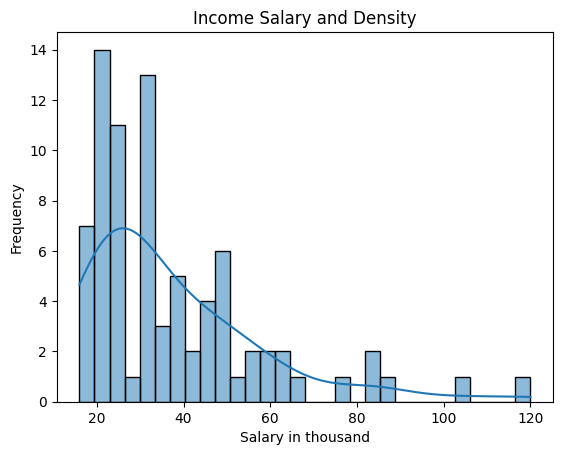

In [70]:
# The kernel density estimation method finds a smooth-curve approximation for a histogram. 
# At each value, it takes into account how many observations are nearby and their distance, with more weight given those closer. 
# Increasing the bandwidth increases the influence of observations further away. 
# Plot a smooth-curve approximation for the histogram of income values. 
# Summarize the impact of increasing and of decreasing the bandwidth substantially from the default value.

income_data = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Income.dat', sep=r'\s+')

sns.histplot(income_data["income"], bins=30, kde=True, kde_kws={'bw_adjust':1})
 
# Adding labels and title
plt.xlabel('Salary in thousand')
plt.ylabel('Frequency')
plt.title('Income Salary and Density')


plt.show()


`(d) Your answer goes here`

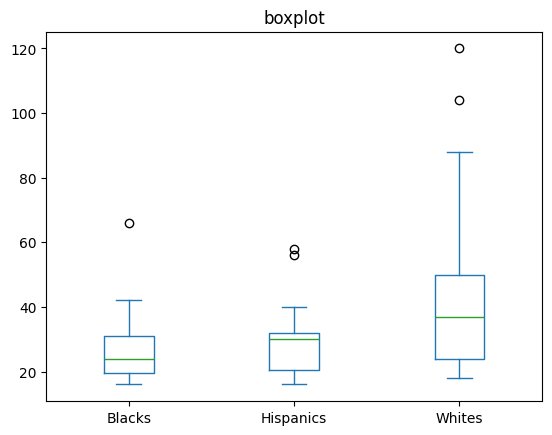

In [87]:
# Construct and interpret side-by-side box plots of income by race (B = Black, H = Hispanic, W = White). 
# Compare the incomes using numerical descriptive statistics

blacks = income_data[income_data.race.isin(["B"])]
hispanics = income_data[income_data.race.isin(["H"])]
whites = income_data[income_data.race.isin(["W"])]


box_data = pd.DataFrame({
        "Blacks": blacks["income"], 
        "Hispanics": hispanics["income"],
        "Whites": whites["income"]
        })

box_data.plot(kind='box', title='boxplot')
 
# Display the figure
plt.show()

## **Problem # 1.19.** 
The `Houses` data file ([http://stat4ds.rwth-aachen.de/data/Houses.dat](http://stat4ds.rwth-aachen.de/data/Houses.dat)) at the book’s website lists the selling price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let’s analyze the selling prices. 

(a) Construct a frequency distribution and a histogram. Describe the shape.  
(b) Find the percentage of observations that fall within one standard deviation of the mean. Why is this not close to 68%?  
(c) Construct a box plot, and interpret.   
(d) Use descriptive statistics to compare selling prices according to whether the house is new. 




**Answer:**

`(a) Your answer goes here`

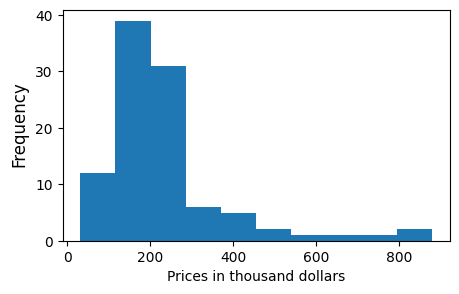

In [223]:
houses_data = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Houses.dat', sep=r'\s+')

histogram_plot("Frequency", "Prices", houses_data, "price")



`(b) Your answer goes here`


`(c) Your answer goes here`

`(d) Your answer goes here`